# Average Salary By Title



In [54]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
from config import pg_key
import psycopg2
import matplotlib.pyplot as plt
import matplotlib.colors as colors



In [55]:
#engine = create_engine('postgresql://localhost:5432/HW6')
con = psycopg2.connect(database="HW6", user="postgres", password=pg_key, host="127.0.0.1", port="5432")
#connection = engine.connect(password=pg_key)




In [56]:
cur = con.cursor()
#cur.execute("SELECT salary from salaries")

cur.execute("select titles.title, round(AVG(salaries.salary))  from titles INNER JOIN salaries ON titles.emp_no = salaries.emp_no GROUP BY titles.title")
rows = cur.fetchall()

title = []
avg_salary = []
for row in rows:
    title.append(row[0])
    avg_salary.append(row[1])

In [57]:
#print(title)
#print(avg_salary)
#print(avg_salary[0]+avg_salary[1])
avg_salary.sort(reverse=True)

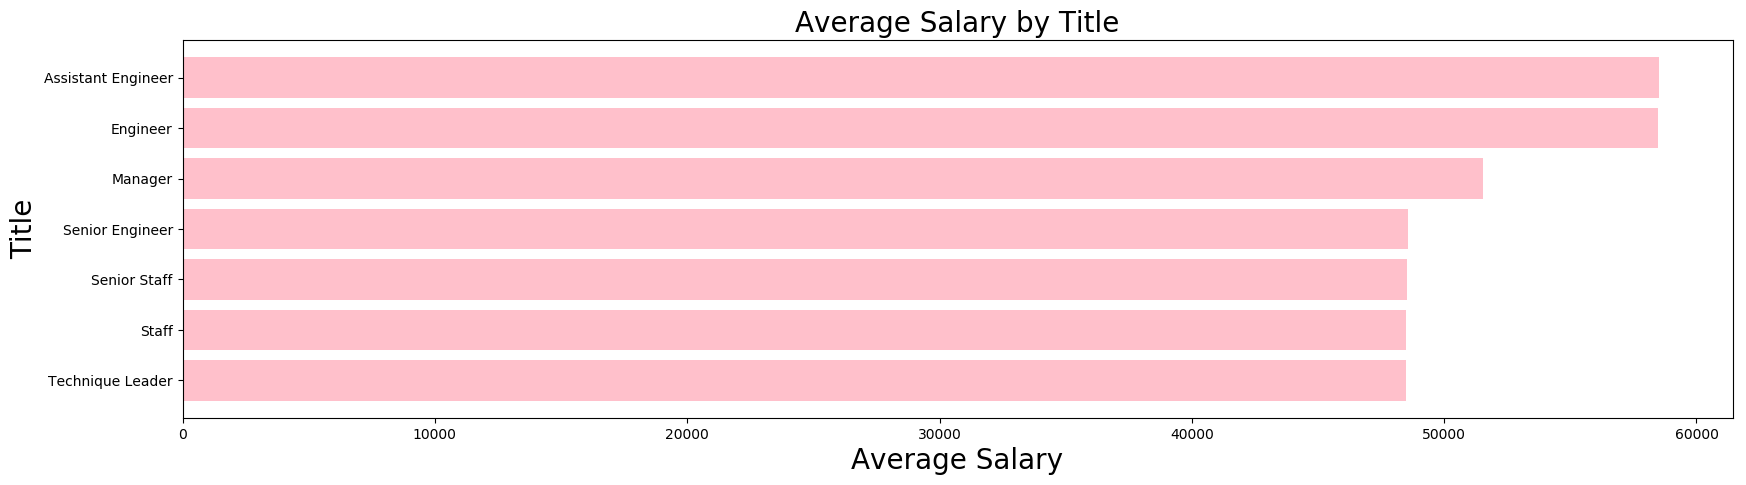

In [59]:
fig, ax = plt.subplots(nrows = 1, ncols=1, figsize = (20,5), dpi=100)
ax.barh(title, avg_salary, color = "pink", align="center")
ax.invert_yaxis()
ax.set_title("Average Salary by Title", fontsize=20)
ax.set_xlabel("Average Salary", fontsize=20)
ax.set_ylabel("Title", fontsize=20)
fig.savefig("Average Salary By Title")

